## 1. Import the necessary libraries

In [31]:
from gensim.models import Word2Vec,KeyedVectors
import numpy as np
from tqdm import tqdm
import pandas as pd
from keras.utils import to_categorical
import numpy as np
from tensorflow.keras.utils import plot_model
from pyvi import ViTokenizer
import matplotlib.pyplot as plt
import import_ipynb
from EDASentimentAnalysis import remove_pucntuation,remove_stopword
from sklearn.manifold import TSNE
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## 2 Data preprocessing

> Read File CSV

In [32]:
def ReadData(path):
    df=pd.read_csv(path,encoding='utf-8')
    return df['comment'], df['label']

> Execute function

In [33]:
X_train,y_train = ReadData("../DataPhone/trainprocessed.csv")
X_test,y_test=ReadData("../DataPhone/testprocesssed.csv")

In [34]:
print(f"X_Train size:{X_train.shape}")
print(f"y_train size {y_train.shape}")

X_Train size:(8898,)
y_train size (8898,)


> word separation

In [35]:
def wordseparation(comment):
    return [review.split() for review in comment]

In [36]:
X_train=wordseparation(X_train)
X_test=wordseparation(X_test)
print(f"X_Train: {X_train[0:2]}")
print(f"X_test: {X_test[0:2]}")

X_Train: [['pin', 'kém', 'còn', 'miễn', 'chê', 'mua', '832019', 'tình_trạng', 'pin', 'còn', '88', 'ai', 'giống', 'tôi'], ['sao', 'gọi', 'điện_thoại', 'màn_hình', 'chấm', 'nhỏ', 'nháy', 'gần', 'camera', 'vậylúc']]
X_test: [['điện', 'thoải', 'ổn', 'facelock', 'cực', 'nhanh', 'vân', 'tay', 'ôk', 'màn_hình', 'lớn', 'pin', 'trâu', 'liên_quân', 'zalo', 'youtube', 'một', 'ngày', 'mất', 'khoảng', '45', 'tuy', 'chip', '439', 'mượt', 'đa_nhiệm', 'khá', 'ổn'], ['mình', 'mới', 'mua', 'vivo91c', 'tải', 'ứng_dụng', 'games', 'nhanh', 'hài_lòng', 'cài', 'hình', 'nền', 'khóa', 'màn_hình', 'hay', 'mình', 'biết', 'hết', 'chức_năng', 'nó', 'tư_vấn', 'viên', 'nhiệt_tình']]


> word embedding

In [37]:
model_wordembedding = Word2Vec(sentences=X_train, vector_size=128, window=5, min_count=0, workers=4, sg=1)
model_wordembedding.wv.save("../model/word.model")

> Load Model_Word2Vec

In [38]:
model_embedding = KeyedVectors.load('../model/word.model')
num_words = len(model_embedding.index_to_key)
print("Number of Words:", num_words)
print("Vector:", model_embedding.get_vector('phần_mềm'))

Number of Words: 12613
Vector: [ 0.16172853 -0.278568   -0.0461941   0.13844292  0.07370341 -0.11979046
 -0.11598067 -0.0347026  -0.14124215  0.2156179   0.07516915 -0.03504134
 -0.5774428   0.11728336 -0.0072672   0.13131368 -0.26372328 -0.17600691
 -0.22410437  0.24287802  0.08345135  0.11067151  0.20106915 -0.365353
 -0.38323814  0.19746275 -0.48308873  0.11515846  0.06535125 -0.24775797
 -0.1251122  -0.05466169  0.26828304  0.25344363 -0.21360612  0.02856587
  0.46479604 -0.20313725  0.12600148  0.18823346  0.1342776   0.16426206
 -0.20075822  0.1992957   0.3443934   0.01582637 -0.3851738   0.1824306
 -0.10296895 -0.03500751  0.27597794  0.22070159  0.3395278   0.1717564
  0.00218795  0.33917618  0.49149257 -0.22672209 -0.03544141 -0.08751876
 -0.11665499 -0.22265403  0.43613708  0.2893295   0.09791177 -0.01790611
  0.05677631  0.28548917  0.03083311 -0.16634099  0.5746111  -0.24258524
 -0.04812232 -0.2669181  -0.09543618  0.16283126 -0.27741334 -0.16050151
 -0.341852    0.5053032 

> Get a list of vector representations of words

In [39]:
# Lấy danh sách các vectơ từ
vectors = [model_embedding.get_vector(word) for word in model_embedding.index_to_key]
vectors_array = np.array(vectors)
# Giảm chiều dữ liệu từ 128 chiều xuống còn 2 chiều bằng t-SNE
tsne = TSNE(n_components=2, random_state=42)
vectors_2d = tsne.fit_transform(vectors_array)
print(vectors_2d[0:2])

[[86.61762  19.646923]
 [75.66911  34.727962]]


> Visualize the context and semantic correlation of words

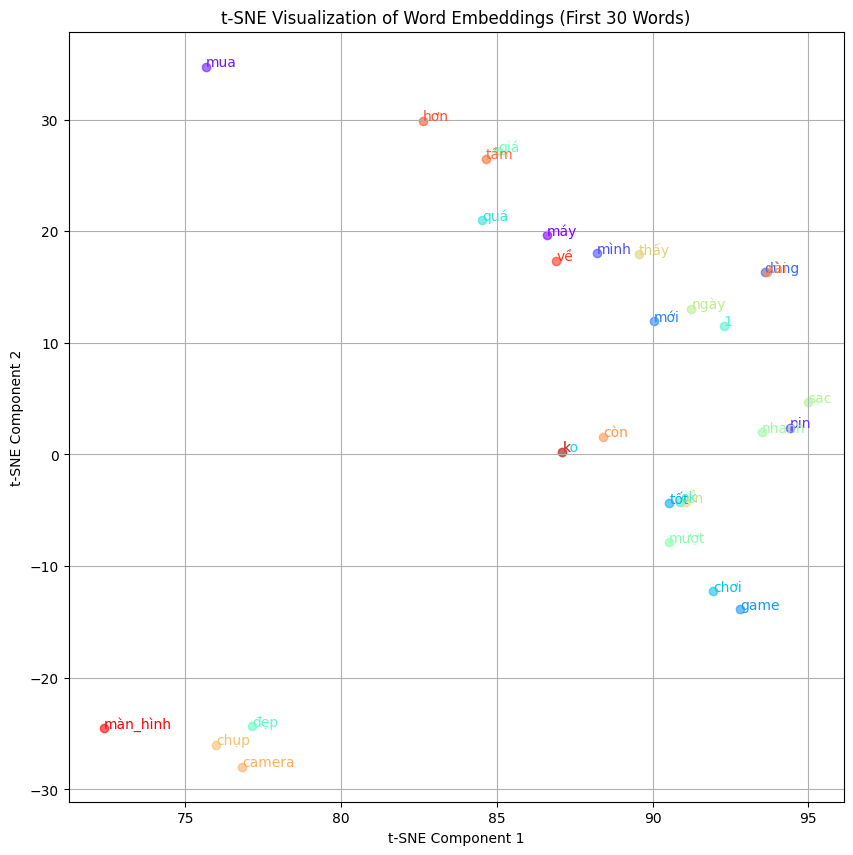

In [40]:
# Trực quan hóa các vectơ từ
plt.figure(figsize=(10, 10))
num_words = 30
# Màu cho mỗi từ
colors = plt.cm.rainbow(np.linspace(0, 1, num_words))

# Vẽ các điểm dữ liệu (từ) với màu khác nhau
for i, word in enumerate(model_embedding.index_to_key[:num_words]):  
    plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1], marker='o', color=colors[i], alpha=0.6)
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=10, color=colors[i])

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Word Embeddings (First 30 Words)')
plt.grid(True)
plt.show()


> Corpus

In [41]:
model_embedding.key_to_index

{'máy': 0,
 'mua': 1,
 'pin': 2,
 'mình': 3,
 'dùng': 4,
 'mới': 5,
 'game': 6,
 'tốt': 7,
 'chơi': 8,
 'ko': 9,
 'quá': 10,
 'ok': 11,
 '1': 12,
 'đẹp': 13,
 'giá': 14,
 'mượt': 15,
 'nhanh': 16,
 'sạc': 17,
 'ngày': 18,
 'ổn': 19,
 'thấy': 20,
 'chụp': 21,
 'camera': 22,
 'còn': 23,
 'xài': 24,
 'tầm': 25,
 'hơn': 26,
 'về': 27,
 'k': 28,
 'màn_hình': 29,
 'trâu': 30,
 'trong': 31,
 'đc': 32,
 'hơi': 33,
 '2': 34,
 'sản_phẩm': 35,
 'lỗi': 36,
 'khá': 37,
 'tháng': 38,
 'tay': 39,
 'sao': 40,
 'nhân_viên': 41,
 'hay': 42,
 'con': 43,
 'mọi': 44,
 'sử_dụng': 45,
 'hình': 46,
 'sài': 47,
 'hết': 48,
 'ngon': 49,
 'nói_chung': 50,
 'nóng': 51,
 'vân': 52,
 'nhiệt_tình': 53,
 'thứ': 54,
 'lắm': 55,
 '3': 56,
 'nghe': 57,
 'nó': 58,
 'luôn': 59,
 'loa': 60,
 'điện_thoại': 61,
 'lag': 62,
 'khác': 63,
 'ảnh': 64,
 'wifi': 65,
 'tệ': 66,
 'người': 67,
 'xem': 68,
 'biết': 69,
 'mấy': 70,
 'nào': 71,
 'ở': 72,
 'cấu_hình': 73,
 'lần': 74,
 'dc': 75,
 'bạn': 76,
 'đổi': 77,
 'nói': 78,
 'hàng'

> Check to see how many words the longest sentence has

In [42]:
max_sequence = max([len(seq) for seq in X_train])
max_sequence_t=max ([len(seq) for seq in X_test ])
print(max_sequence)
print(max_sequence_t)

129
131


> representation for unknown words

In [43]:
embedding_size = 128

> convert words to vector space and padding

In [44]:
def comment_embedding(comment):
    matrix = np.zeros((131, embedding_size))
    for i, word in enumerate(comment):
            if word in model_embedding:
                matrix[i] = model_embedding.get_vector(word)
    return matrix

> Execute Function

In [45]:
train_data = []
test_data =[]
for x in tqdm(X_train):
    train_data.append(comment_embedding(x))
for y in tqdm(X_test): 
    test_data.append(comment_embedding(y))
test_data=np.array(test_data)
train_data=np.array(train_data)

100%|██████████| 2224/2224 [00:00<00:00, 6436.36it/s]


> Convert labels to numbers

In [46]:
label_encoder = LabelEncoder()
# Mã hóa các nhãn văn bản thành các giá trị số
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded=label_encoder.fit_transform(y_test)
print(y_train_encoded[0:3])

[1 0 1]


> Convert label to one_hot_vector

In [47]:
# Biểu diễn nhãn dưới dạng one-hot vector
y_train_onehot = to_categorical(y_train_encoded)
print(y_train_onehot[0:3])

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


## 3.Built Model CNN

### 3.1. Design configuration for CNN network

In [48]:
num_classes = 3
filter_sizes = 3
num_filters = 150
epochs = 50
dropout_rate = 0.3
embedding_size=128

> transform input properties

In [49]:
x_train = train_data.reshape(train_data.shape[0], 131, embedding_size, 1).astype('float32')

### 3.2. Model CNN

In [50]:
# Define the model
model = Sequential()
# Add a convolutional layer
model.add(Conv2D(num_filters, (filter_sizes, embedding_size), activation='relu',
                 input_shape=(131, embedding_size, 1),name='convolution_layer'))
model.add(MaxPooling2D(pool_size=(2, 1),strides=(2, 1),name='max_pooling'))
model.add(Dropout(dropout_rate))
model.add(Flatten())
model.add(Dense(9, activation='relu',name='layer_dense_1'))
model.add(Dense(9, activation='relu',name='layer_dense_2'))
model.add(Dense(9, activation='relu',name='layer_dense_3'))
model.add(Dense(9, activation='relu',name='layer_dense_4'))
model.add(Dense(9, activation='relu',name='layer_dense_5'))
model.add(Dense(9, activation='relu',name='layer_dense_6'))
model.add(Dense(9, activation='relu',name='layer_dense_7'))
model.add(Dense(9, activation='relu',name='layer_dense_8'))
model.add(Dense(3, activation='softmax'))

c:\Users\hdang\.virtualenvs\DM-xmUrTfoX\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


### 3.3. Hyperparameter

In [51]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### 3.4. Train

In [52]:
model.fit(x_train ,y_train_onehot, verbose=1, epochs=epochs)

Epoch 1/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6135 - loss: 0.8739
Epoch 2/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7932 - loss: 0.5516
Epoch 3/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8030 - loss: 0.5327
Epoch 4/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8078 - loss: 0.5121
Epoch 5/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8232 - loss: 0.4740
Epoch 6/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8208 - loss: 0.4588
Epoch 7/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8292 - loss: 0.4564
Epoch 8/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8245 - loss: 0.4494
Epoch 9/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8262 - loss: 0.4299
Epoch 10/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8287 - loss: 0.4243
Epoch 11/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8372 - loss: 0.4018
Epoch 12/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 

>Network Architecture

In [53]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolution_layer (Conv2D)      │ (None, 129, 1, 150)    │        57,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling (MaxPooling2D)      │ (None, 64, 1, 150)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 1, 150)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_dense_1 (Dense)           │ (None, 9)              │        86,409 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_dense_2 (Dense)           │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_dense_3 (Dense)           │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_dense_4 (Dense)           │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_dense_5 (Dense)           │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_dense_6 (Dense)           │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_dense_7 (Dense)           │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_dense_8 (Dense)           │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            30 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 434,459 (1.66 MB)

 Trainable params: 144,819 (565.70 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 289,640 (1.10 MB)

None


> Network Architecture Diagram

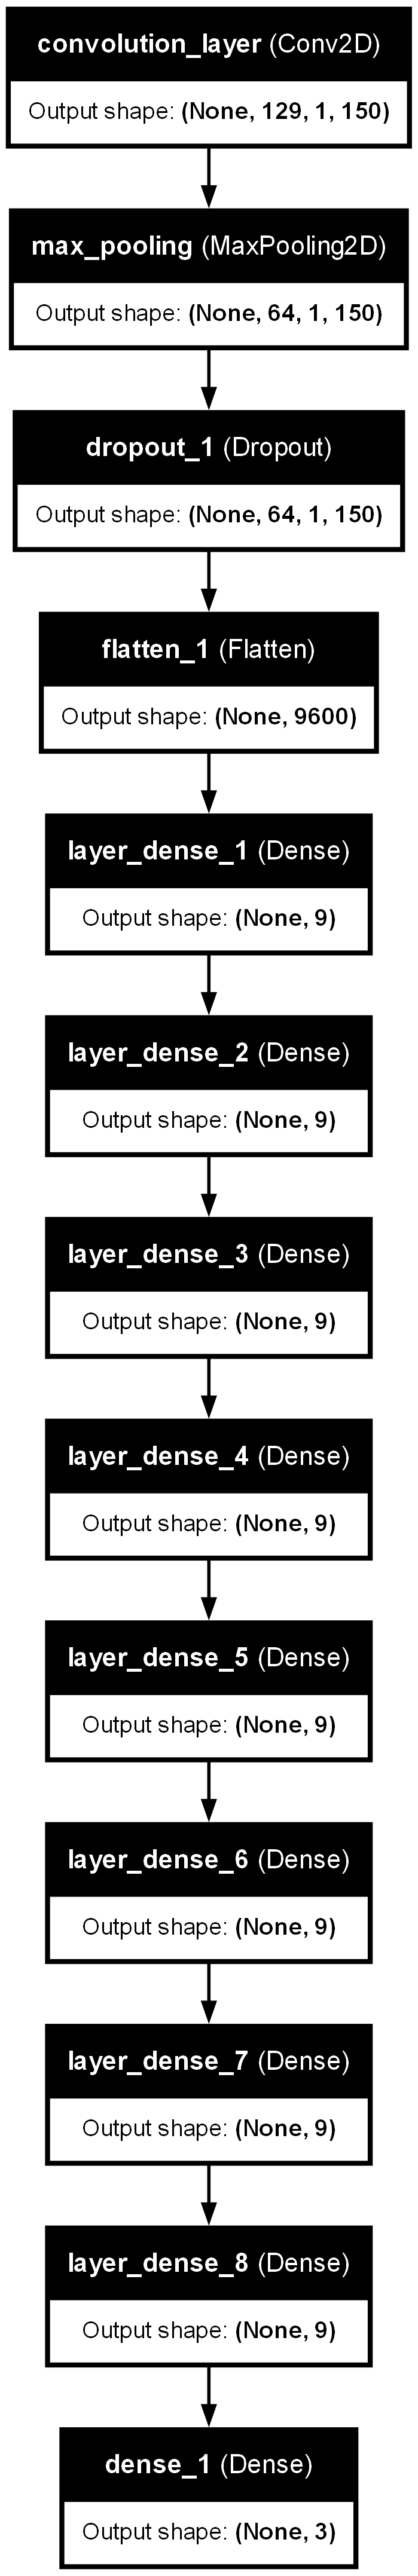

In [54]:
plot_model(model, to_file='../Picture_Model/model_CNN_sentiment_plot.png', show_shapes=True, show_layer_names=True)

> Dump file model_cnn_sentiment.h5

In [55]:
model.save('../model/model_cnn_sentiment.h5')

### 3.5 Evaluation test dataset

> Load file models_sentiment.h5

In [56]:
model_sentiment=load_model("../model/model_cnn_sentiment.h5")

> predict  test dataset 

In [57]:
result = model_sentiment.predict(test_data)

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


> First 10 lines of comments

In [58]:
predict_labels = np.argmax(result,axis=1)
print(predict_labels[0:10])
# Decode the predicted labels
predicted_labels_decoded = label_encoder.inverse_transform(predict_labels)
print(predicted_labels_decoded[0:10])


[2 1 2 0 2 0 2 2 2 2]
['Positive' 'Neutral' 'Positive' 'Negative' 'Positive' 'Negative'
 'Positive' 'Positive' 'Positive' 'Positive']


> Predict one a new sample

In [59]:
comment = "Tôi mới mua iphone 15 pro max pin trâu màn hình đẹp dễ sử dụng"
comment = remove_pucntuation(comment.lower())
comment = remove_stopword(comment)
comment = [ViTokenizer.tokenize(comment)]
print(comment)
separatemeaningfulwords = wordseparation(comment)
maxtrix_embedding =np.expand_dims(comment_embedding(separatemeaningfulwords[0]),axis=0)
result_one = model_sentiment.predict(maxtrix_embedding)
result_one = np.argmax(result_one,axis=1)
# Decode the predicted labels
print(label_encoder.inverse_transform(result_one))


['tôi mới mua iphone 15 pro max pin trâu màn_hình đẹp dễ sử_dụng']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
['Positive']


> Evaluate the model through Accuracy measures,Precision,Recall,F1-score,

In [60]:
accuracy = accuracy_score(y_test_encoded, predict_labels)
print(f'Accuracy: {accuracy:.4f}')

precision = precision_score(y_test_encoded, predict_labels, average='weighted')
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test_encoded, predict_labels, average='weighted')
print(f"Recall: {recall:.4f}")

f1score = f1_score(y_test_encoded, predict_labels, average='weighted')
print(f"F1-score: {f1score}")

Accuracy: 0.8094
Precision: 0.8057
Recall: 0.8094
F1-score: 0.8073555055849971
